In [1]:
import sys
sys.path.insert(1, '/home/nicolas/code/src/')
sys.path.insert(1, '/home/nicolas/code/model/')
import torch
from GBRBM import GBRBM
import functions
import matplotlib.pyplot as plt
import numpy as np
import math
import h5py
device = torch.device("cuda")
dtype = torch.float

# Gaussian-Bernoulli RBM YEAST 
 - Nh = 100
 - lr = 0.01
 - Ngibbs = 10

In [2]:
X = torch.load("../dataset/yeast.pt")
fname = "../model/GBRBM/YEAST/AllParametersGBRBM_YEAST_NGibbs100_Nh100_Nmb50_Nepoch1000_var_est_lrW10.01_lrW20.0001.h5"
f = h5py.File(fname, 'r')
alltime = np.array(f['alltime'])
alltimes = []
for t in f['alltime'][:]:
    if 'W_1'+str(t) in f:
        alltimes.append(t)
alltimes_est = np.array(alltimes)

In [3]:
X.shape 

(103, 1500)

In [4]:
myRBM_est = GBRBM(num_visible=X.shape[0],
                   num_hidden=100,
                   device=device,
                   lr_W1=0.01,
                   lr_W2=1e-4,
                   gibbs_steps=10,
                   UpdCentered=False,
                   mb_s=50,
                   num_pcd=50,
                   var_set = False)
vinit = torch.normal(torch.zeros((myRBM_est.Nv,1000), device=myRBM_est.device, dtype=myRBM_est.dtype))

alls_set = []
base = 1.7
v = np.array([0,1],dtype=int)
for k in range(30):
    v = np.append(v,int(base**k))

    
label = []
at = np.abs(alltimes_est-t)
idx = np.argmin(at)
t2 = alltimes_est[idx]
label.append(t2)
myRBM_est.W_1 = torch.tensor(f['W_1'+str(t2)], device = myRBM_est.device)
myRBM_est.W_2 = torch.tensor(f['W_2'+str(t2)], device = myRBM_est.device)

myRBM_est.vbias = torch.tensor(f['vbias'+str(t2)], device = myRBM_est.device)
myRBM_est.hbias = torch.tensor(f['hbias'+str(t2)], device = myRBM_est.device)    
si,mi,_,_ = myRBM_est.Sampling(vinit,it_mcmc=100)#,anneal_steps=0)
alls_set.append(np.linalg.svd(si.cpu().numpy()/1000**0.5)[1])
for t in v:
    at = np.abs(alltimes_est-t)
    idx = np.argmin(at)
    t2 = alltimes_est[idx]
    #print(t, t2)
    if t2!=label[-1]:
        label.append(t2)
        myRBM_est.W_1 = torch.tensor(f['W_1'+str(t2)], device = myRBM_est.device)
        myRBM_est.W_2 = torch.tensor(f['W_2'+str(t2)], device = myRBM_est.device)

        myRBM_est.vbias = torch.tensor(f['vbias'+str(t2)], device = myRBM_est.device)
        myRBM_est.hbias = torch.tensor(f['hbias'+str(t2)], device = myRBM_est.device)    
        si,mi,_,_ = myRBM_est.Sampling(vinit,it_mcmc=10)#,anneal_steps=0)
        alls_set.append(np.linalg.svd(si.cpu()/1000**0.5)[1])

In [5]:
X = torch.load("../dataset/yeast.pt")
fname = "../model/GBRBM/YEAST/AllParametersGBRBM_YEAST_NGibbs100_Nh100_Nmb50_Nepoch1000_var_set_lrW10.01_lrW20.0001.h5"
f = h5py.File(fname, 'r')
alltime = np.array(f['alltime'])
alltimes = []
for t in f['alltime'][:]:
    if 'W_1'+str(t) in f:
        alltimes.append(t)
alltimes_set = np.array(alltimes)

myRBM_set = GBRBM(num_visible=X.shape[0],
                   num_hidden=100,
                   device=device,
                   lr_W1=0.01,
                   lr_W2=1e-4,
                   gibbs_steps=10,
                   UpdCentered=False,
                   mb_s=50,
                   num_pcd=50,
                   var_set = True)
vinit = torch.normal(torch.zeros((myRBM_set.Nv,1000), device=myRBM_set.device, dtype=myRBM_set.dtype))

alls_est = []
base = 1.7
v = np.array([0,1],dtype=int)
for k in range(30):
    v = np.append(v,int(base**k))

    
label = []
at = np.abs(alltimes_set-t)
idx = np.argmin(at)
t2 = alltimes_set[idx]
label.append(t2)
myRBM_set.W_1 = torch.tensor(f['W_1'+str(t2)], device = myRBM_set.device)
myRBM_set.W_2 = torch.tensor(f['W_2'+str(t2)], device = myRBM_set.device)

myRBM_set.vbias = torch.tensor(f['vbias'+str(t2)], device = myRBM_set.device)
myRBM_set.hbias = torch.tensor(f['hbias'+str(t2)], device = myRBM_set.device)    
si,mi,_,_ = myRBM_set.Sampling(vinit,it_mcmc=100)#,anneal_steps=0)
alls_est.append(np.linalg.svd(si.cpu().numpy()/1000**0.5)[1])
for t in v:
    at = np.abs(alltimes_set-t)
    idx = np.argmin(at)
    t2 = alltimes_set[idx]
    #print(t, t2)
    if t2!=label[-1]:
        label.append(t2)
        myRBM_set.W_1 = torch.tensor(f['W_1'+str(t2)], device = myRBM_set.device)
        myRBM_set.W_2 = torch.tensor(f['W_2'+str(t2)], device = myRBM_set.device)

        myRBM_set.vbias = torch.tensor(f['vbias'+str(t2)], device = myRBM_set.device)
        myRBM_set.hbias = torch.tensor(f['hbias'+str(t2)], device = myRBM_set.device)    
        si,mi,_,_ = myRBM_set.Sampling(vinit,it_mcmc=10)#,anneal_steps=0)
        alls_est.append(np.linalg.svd(si.cpu()/1000**0.5)[1])

In [6]:
newX = X[:,:1000]
_,_,V = torch.svd(torch.tensor(X.T))
vinit = torch.normal(torch.zeros((myRBM_set.Nv,1000), device=myRBM_set.device, dtype=myRBM_set.dtype))
data_est,_,_,_ = myRBM_est.Sampling(vinit, it_mcmc=100)
vinit = torch.normal(torch.zeros((myRBM_set.Nv,1000), device=myRBM_set.device, dtype=myRBM_set.dtype))
data_set,_,_,_ = myRBM_set.Sampling(vinit, it_mcmc=100)
proj_gen_est = torch.mm(data_est.cpu().float().T, V.cpu().float())
proj_gen_set = torch.mm(data_set.cpu().float().T, V.cpu().float())

proj_data = torch.mm(torch.tensor(X).T, V)

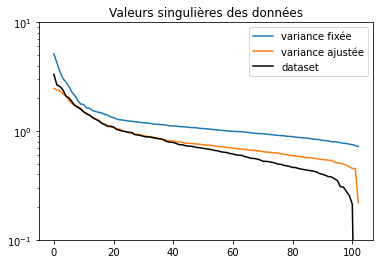

In [7]:
plt.plot(alls_est[-1], label = "variance fixée")
plt.plot(alls_set[-1], label="variance ajustée")
plt.plot(np.linalg.svd(newX/1000**0.5)[1],color='black', label = "dataset")
plt.semilogy()
plt.legend()
plt.title("Valeurs singulières des données")
plt.ylim(0.1,10);
plt.savefig("../../Stage/rapport/fig/yeast_comparison.png")

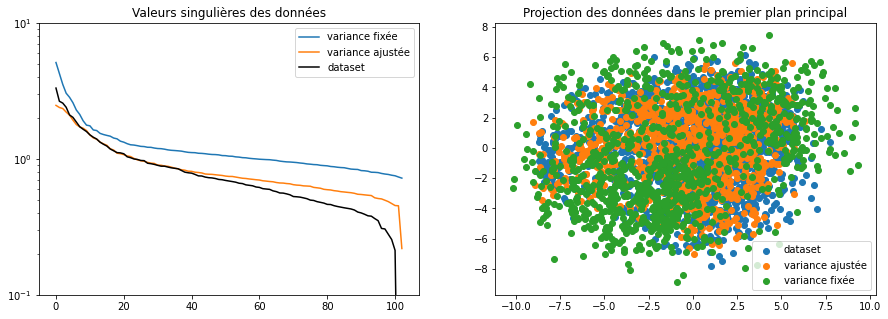

In [8]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

#for t in range(len(alls_est)):
#    plt.plot(alls_est[t], label = label[t])
#    plt.plot(alls_set[t], label = label[t])
ax1.plot(alls_est[-1], label = "variance fixée")
ax1.plot(alls_set[-1], label="variance ajustée")
ax1.plot(np.linalg.svd(newX/1000**0.5)[1],color='black', label = "dataset")
ax1.semilogy()
ax1.legend()
ax1.set_title("Valeurs singulières des données")
ax1.set_ylim(0.1,10)

ax2.scatter(proj_data[:,0], proj_data[:,1], label = "dataset")
ax2.scatter(proj_gen_est[:,0], proj_gen_est[:,1], label = "variance ajustée")
ax2.scatter(proj_gen_set[:,0], proj_gen_set[:,1], label = "variance fixée")
ax2.legend()
ax2.set_title("Projection des données dans le premier plan principal")
plt.savefig("../../Stage/rapport/fig/yeast_comparison.png")

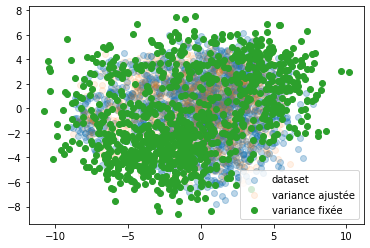

In [9]:
_,_,V = torch.svd(torch.tensor(X.T))
vinit = torch.normal(torch.zeros((myRBM_set.Nv,1000), device=myRBM_set.device, dtype=myRBM_set.dtype))
data_est,_,_,_ = myRBM_est.Sampling(vinit, it_mcmc=100)
vinit = torch.normal(torch.zeros((myRBM_set.Nv,1000), device=myRBM_set.device, dtype=myRBM_set.dtype))
data_set,_,_,_ = myRBM_set.Sampling(vinit, it_mcmc=100)
proj_gen_est = torch.mm(data_est.cpu().float().T, V.cpu().float())
proj_gen_set = torch.mm(data_set.cpu().float().T, V.cpu().float())

proj_data = torch.mm(torch.tensor(X).T, V)
plt.scatter(proj_data[:,0], proj_data[:,1], label = "dataset", alpha = 0.3)
plt.scatter(proj_gen_est[:,0], proj_gen_est[:,1], label = "variance ajustée", alpha=0.1)
plt.scatter(proj_gen_set[:,0], proj_gen_set[:,1], label = "variance fixée")
plt.legend()
plt.savefig("../../Stage/rapport/fig/data_gen_yeast.png")


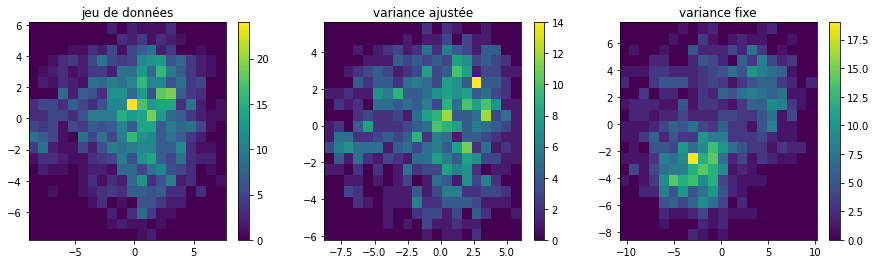

In [10]:
nbins = 20
Z_data, xedges_data, yedges_data = np.histogram2d(proj_data[:,0].cpu().numpy(), proj_data[:,1].cpu().numpy(), bins = nbins)
Z_est, xedges_est, yedges_est = np.histogram2d(proj_gen_est[:,0].cpu().numpy(), proj_gen_est[:,1].cpu().numpy(), bins = nbins)
Z_set, xedges_set, yedges_set = np.histogram2d(proj_gen_set[:,0].cpu().numpy(), proj_gen_set[:,1].cpu().numpy(), bins = nbins)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
im1 = ax1.pcolormesh(xedges_data, yedges_data, Z_data.T)
ax1.set_title("jeu de données")
im2 = ax2.pcolormesh(xedges_est, yedges_est, Z_est.T)
ax2.set_title("variance ajustée")
im3 = ax3.pcolormesh(xedges_set, yedges_set, Z_set.T)
ax3.set_title("variance fixe")
fig.colorbar(im1, ax = ax1)
fig.colorbar(im2, ax = ax2)
fig.colorbar(im3, ax = ax3)
plt.savefig("../../Stage/rapport/fig/densheatmapYEAST.png")

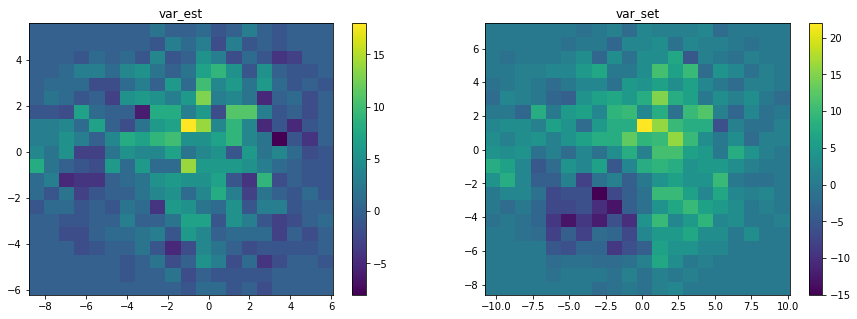

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
im1 = ax1.pcolormesh(xedges_est, yedges_est, Z_data.T - Z_est.T)
ax1.set_title("var_est")
im2 = ax2.pcolormesh(xedges_set, yedges_set, Z_data.T - Z_set.T)
ax2.set_title("var_set")
fig.colorbar(im1, ax = ax1)
fig.colorbar(im2, ax = ax2)


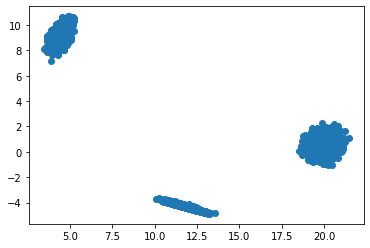

In [12]:
data = torch.load("../dataset/data_2d.pt")
_,_,V = torch.svd(data)
proj_data = torch.mm(data, V).cpu()
plt.scatter(proj_data[:,0],proj_data[:,1])

In [13]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


# Gaussian-Bernoulli RBM dataset synthétique
 - Nh = 100
 - lr = 0.01
 - Ngibbs = 10

In [14]:
data = torch.load("../dataset/data_3c.pt")

fname = "../model/GBRBM/3C/AllParametersGBRBM_3c_NGibbs100_Nh50_Nmb50_Nepoch1000_var_est_lrW10.01_lrW20.0001.h5"
f = h5py.File(fname, 'r')
alltime = np.array(f['alltime'])
alltimes = []
for t in f['alltime'][:]:
    if 'W_1'+str(t) in f:
        alltimes.append(t)
alltimes = np.array(alltimes)


In [15]:
myRBM = GBRBM(num_visible=data.shape[0],
                   num_hidden=50,
                   device=device,
                   lr_W1=0.01,
                   lr_W2=1e-4,
                   gibbs_steps=10,
                   UpdCentered=False,
                   mb_s=50,
                   num_pcd=50,
                   var_set = False)
vinit = torch.normal(torch.zeros((myRBM.Nv,1000), device=myRBM.device, dtype=myRBM.dtype))

alls = []
base = 1.7
v = np.array([0,1],dtype=int)
for k in range(30):
    v = np.append(v,int(base**k))

t2 = alltimes[-1]
t2 = 4867
myRBM.W_1 = torch.tensor(f['W_1'+str(t2)], device = myRBM.device)
myRBM.W_2 = torch.tensor(f['W_2'+str(t2)], device = myRBM.device)

myRBM.vbias = torch.tensor(f['vbias'+str(t2)], device = myRBM.device)
myRBM.hbias = torch.tensor(f['hbias'+str(t2)], device = myRBM.device) 

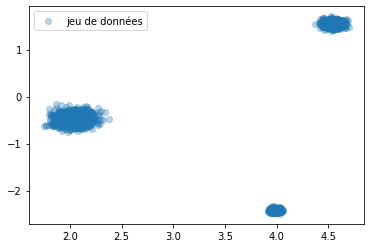

In [16]:
_,_,V = torch.svd(myRBM.W_1)

proj_data = torch.mm(data.T, V).cpu().numpy()/myRBM.Nv**.5
plt.scatter(proj_data[:,0],proj_data[:,1],alpha=0.3, label="jeu de données")
#plt.scatter(proj_gen[:,0],proj_gen[:,1], alpha = 0.3, label = "données générées")
plt.legend()
plt.savefig("../../Stage/rapport/fig/GBRBMvarest3cdataset")

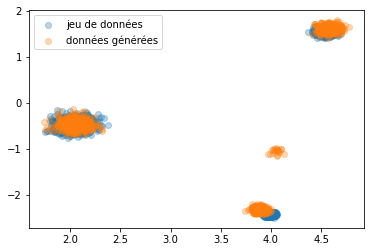

In [17]:
vinit = torch.normal(torch.zeros((myRBM.Nv,1000), device=myRBM.device, dtype=myRBM.dtype))
si,_,_,_ = myRBM.Sampling(vinit, it_mcmc = 100)
_,_,V = torch.svd(myRBM.W_1)
proj_gen = torch.mm(si.T, V).cpu().numpy()/myRBM.Nv**.5
proj_data = torch.mm(data.T, V).cpu().numpy()/myRBM.Nv**.5
plt.scatter(proj_data[:,0],proj_data[:,1],alpha=0.3, label="jeu de données")
plt.scatter(proj_gen[:,0],proj_gen[:,1], alpha = 0.3, label = "données générées")
plt.legend()
plt.savefig("../../Stage/rapport/fig/GBRBMvarest3c")

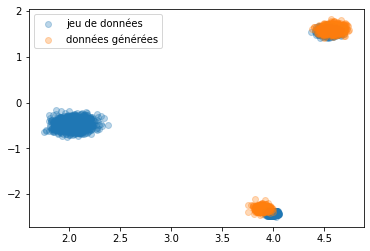

In [18]:
vinit = torch.normal(torch.zeros((myRBM.Nv,1000), device=myRBM.device, dtype=myRBM.dtype))
si,_,_,_ = myRBM.Sampling(vinit, it_mcmc = 10000)
_,_,V = torch.svd(myRBM.W_1)
proj_gen = torch.mm(si.T, V).cpu().numpy()/myRBM.Nv**.5
proj_data = torch.mm(data.T, V).cpu().numpy()/myRBM.Nv**.5
plt.scatter(proj_data[:,0],proj_data[:,1],alpha=0.3, label="jeu de données")
plt.scatter(proj_gen[:,0],proj_gen[:,1], alpha = 0.3, label = "données générées")
plt.legend()
plt.savefig("../../Stage/rapport/fig/GBRBMvarest3c_bad")

In [19]:
alltimes

array([    0,     1,     2,     3,     4,     5,     6,     8,     9,
          10,    12,    14,    15,    16,    18,    22,    24,    25,
          26,    28,    32,    38,    41,    42,    43,    45,    48,
          49,    55,    65,    69,    70,    71,    73,    77,    82,
          83,    93,   110,   118,   119,   120,   122,   126,   132,
         138,   142,   159,   187,   201,   202,   203,   205,   209,
         215,   225,   236,   242,   270,   319,   342,   343,   344,
         346,   350,   356,   366,   383,   402,   411,   460,   543,
         582,   583,   584,   586,   590,   596,   606,   623,   651,
         684,   700,   783,   924,   990,   991,   992,   994,   998,
        1004,  1014,  1031,  1059,  1108,  1164,  1191,  1332,  1572,
        1683,  1684,  1685,  1687,  1691,  1697,  1707,  1724,  1752,
        1801,  1884,  1980,  2025,  2265,  2673,  2862,  2863,  2864,
        2866,  2870,  2876,  2886,  2903,  2931,  2980,  3063,  3204,
        3366,  3444,

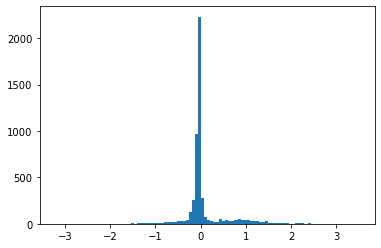

In [20]:
plt.hist(myRBM.W_1.reshape(5000,1).cpu().numpy(), bins = 100);

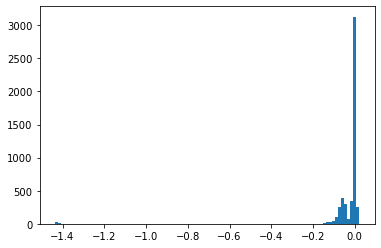

In [21]:
plt.hist(myRBM.W_2.reshape(5000,1).cpu().numpy(), bins = 100);

In [22]:
data.shape

torch.Size([100, 3000])

In [23]:
myRBM.W_1.shape

torch.Size([50, 100])